In [1]:
import numpy as np
import xarray as xr
from rich import pretty

pretty.install()

In [2]:
n = 5

values_pos = np.linspace(-5, 5, n)
dimensions_pos = ("position_x",)
# the "unit" and "long_name" are a convention for automatic plotting
attrs_pos = dict(unit="m", long_name="Position")  # attributes of this data variable

values_vel = np.linspace(0, 10, n)
dimensions_vel = ("velocity_x",)
attrs_vel = dict(unit="m/s", long_name="Velocity")

data_vars = dict(
    position=(dimensions_pos, values_pos, attrs_pos),
    velocity=(dimensions_vel, values_vel, attrs_vel),
)

dataset_attrs = dict(my_attribute_name="some meta information")

dataset = xr.Dataset(
    data_vars=data_vars,
    attrs=dataset_attrs,
)  # dataset attributes
dataset

<xarray.Dataset>
Dimensions: (position_x: 5, velocity_x: 5)
Dimensions without coordinates: position_x, velocity_x
Data variables:
 position (position_x) float64 -5.0 -2.5 0.0 2.5 5.0
 velocity (velocity_x) float64 0.0 2.5 5.0 7.5 10.0
Attributes:
 my_attribute_name: some meta information xarray.Dataset Dimensions: position_x : 5 velocity_x : 5 Coordinates: (0) Data variables: (2) position (position_x) float64 -5.0 -2.5 0.0 2.5 5.0 unit : m long_name : Position array([-5. , -2.5, 0. , 2.5, 5. ]) velocity (velocity_x) float64 0.0 2.5 5.0 7.5 10.0 unit : m/s long_name : Velocity array([ 0. , 2.5, 5. , 7.5, 10. ]) Attributes: (1) my_attribute_name : some meta information

In [3]:
dataset.dims

Frozen({'position_x': 5, 'velocity_x': 5})

In [4]:
dataset.variables

Frozen({'position': <xarray.Variable (position_x: 5)>
array([-5. , -2.5,  0. ,  2.5,  5. ])
Attributes:
    unit:       m
    long_name:  Position, 'velocity': <xarray.Variable (velocity_x: 5)>
array([ 0. ,  2.5,  5. ,  7.5, 10. ])
Attributes:
    unit:       m/s
    long_name:  Velocity})

In [5]:
values_vel = 1 + values_pos**2
data_vars = dict(
    position=(dimensions_pos, values_pos, attrs_pos),
    # now the velocity array "lies" along the same dimension as the position array
    velocity=(dimensions_pos, values_vel, attrs_vel),
)
dataset = xr.Dataset(
    data_vars=data_vars,
    # NB We could set "position" as a coordinate directly when creating the dataset:
    # coords=dict(position=(dimensions_pos, values_pos, attrs_pos)),
    attrs=dataset_attrs,
)

# Promote the "position" variable to a coordinate:
# In general, most of the functions that modify the structure of the xarray dataset will
# return a new object, hence the assignment
dataset = dataset.set_coords(["position"])
dataset

<xarray.Dataset>
Dimensions: (position_x: 5)
Coordinates:
 position (position_x) float64 -5.0 -2.5 0.0 2.5 5.0
Dimensions without coordinates: position_x
Data variables:
 velocity (position_x) float64 26.0 7.25 1.0 7.25 26.0
Attributes:
 my_attribute_name: some meta information xarray.Dataset Dimensions: position_x : 5 Coordinates: (1) position (position_x) float64 -5.0 -2.5 0.0 2.5 5.0 unit : m long_name : Position array([-5. , -2.5, 0. , 2.5, 5. ]) Data variables: (1) velocity (position_x) float64 26.0 7.25 1.0 7.25 26.0 unit : m/s long_name : Velocity array([26. , 7.25, 1. , 7.25, 26. ]) Attributes: (1) my_attribute_name : some meta information

In [6]:
dataset.coords["position"]

<xarray.DataArray 'position' (position_x: 5)>
array([-5. , -2.5, 0. , 2.5, 5. ])
Coordinates:
 position (position_x) float64 -5.0 -2.5 0.0 2.5 5.0
Dimensions without coordinates: position_x
Attributes:
 unit: m
 long_name: Position xarray.DataArray 'position' position_x : 5 -5.0 -2.5 0.0 2.5 5.0 array([-5. , -2.5, 0. , 2.5, 5. ]) Coordinates: (1) position (position_x) float64 -5.0 -2.5 0.0 2.5 5.0 unit : m long_name : Position array([-5. , -2.5, 0. , 2.5, 5. ]) Attributes: (2) unit : m long_name : Position

In [7]:
dataset.variables["position"]

<xarray.Variable (position_x: 5)>
array([-5. , -2.5, 0. , 2.5, 5. ])
Attributes:
 unit: m
 long_name: Position xarray.Variable position_x : 5 -5.0 -2.5 0.0 2.5 5.0 array([-5. , -2.5, 0. , 2.5, 5. ]) Attributes: (2) unit : m long_name : Position

In [8]:
dataset = dataset.set_index({"position_x": "position"})
dataset.position_x.attrs["unit"] = "m"
dataset.position_x.attrs["long_name"] = "Position x"
dataset

<xarray.Dataset>
Dimensions: (position_x: 5)
Coordinates:
 * position_x (position_x) float64 -5.0 -2.5 0.0 2.5 5.0
Data variables:
 velocity (position_x) float64 26.0 7.25 1.0 7.25 26.0
Attributes:
 my_attribute_name: some meta information xarray.Dataset Dimensions: position_x : 5 Coordinates: (1) position_x (position_x) float64 -5.0 -2.5 0.0 2.5 5.0 unit : m long_name : Position x array([-5. , -2.5, 0. , 2.5, 5. ]) Data variables: (1) velocity (position_x) float64 26.0 7.25 1.0 7.25 26.0 unit : m/s long_name : Velocity array([26. , 7.25, 1. , 7.25, 26. ]) Attributes: (1) my_attribute_name : some meta information

In [9]:
(
    "position_x" in dataset.dims,
    "position_x" in dataset.coords,
    "position_x" in dataset.variables,
)

(True, True, True)

In [10]:
dataset.dims["position_x"]

5

In [11]:
dataset.coords["position_x"]

<xarray.DataArray 'position_x' (position_x: 5)>
array([-5. , -2.5, 0. , 2.5, 5. ])
Coordinates:
 * position_x (position_x) float64 -5.0 -2.5 0.0 2.5 5.0
Attributes:
 unit: m
 long_name: Position x xarray.DataArray 'position_x' position_x : 5 -5.0 -2.5 0.0 2.5 5.0 array([-5. , -2.5, 0. , 2.5, 5. ]) Coordinates: (1) position_x (position_x) float64 -5.0 -2.5 0.0 2.5 5.0 unit : m long_name : Position x array([-5. , -2.5, 0. , 2.5, 5. ]) Attributes: (2) unit : m long_name : Position x

In [12]:
dataset.variables["position_x"]

<xarray.IndexVariable 'position_x' (position_x: 5)>
array([-5. , -2.5, 0. , 2.5, 5. ])
Attributes:
 unit: m
 long_name: Position x xarray.IndexVariable 'position_x' position_x : 5 -5.0 -2.5 0.0 2.5 5.0 array([-5. , -2.5, 0. , 2.5, 5. ]) Attributes: (2) unit : m long_name : Position x

In [13]:
dataset.velocity

<xarray.DataArray 'velocity' (position_x: 5)>
array([26. , 7.25, 1. , 7.25, 26. ])
Coordinates:
 * position_x (position_x) float64 -5.0 -2.5 0.0 2.5 5.0
Attributes:
 unit: m/s
 long_name: Velocity xarray.DataArray 'velocity' position_x : 5 26.0 7.25 1.0 7.25 26.0 array([26. , 7.25, 1. , 7.25, 26. ]) Coordinates: (1) position_x (position_x) float64 -5.0 -2.5 0.0 2.5 5.0 unit : m long_name : Position x array([-5. , -2.5, 0. , 2.5, 5. ]) Attributes: (2) unit : m/s long_name : Velocity

In [14]:
retrieved_value = dataset.velocity.sel(position_x=2.5)
retrieved_value

<xarray.DataArray 'velocity' ()>
array(7.25)
Coordinates:
 position_x float64 2.5
Attributes:
 unit: m/s
 long_name: Velocity xarray.DataArray 'velocity' 7.25 array(7.25) Coordinates: (1) position_x () float64 2.5 unit : m long_name : Position x array(2.5) Attributes: (2) unit : m/s long_name : Velocity

In [15]:
dataset.velocity.values[3], retrieved_value.values == dataset.velocity.values[3]

(7.25, True)

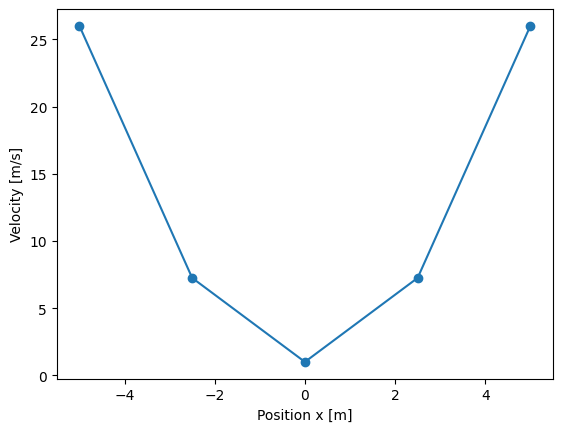

In [16]:
_ = dataset.velocity.plot(marker="o")